In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import pandas_profiling
#import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import lux
from pyclustertend import hopkins

In [2]:
dforg = sns.load_dataset('iris')
df = dforg.copy()
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [3]:
df.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [4]:
df.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe().T

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [6]:
# k means algorithm requires scaling,that dataset is kind of scaled, so i will not do.

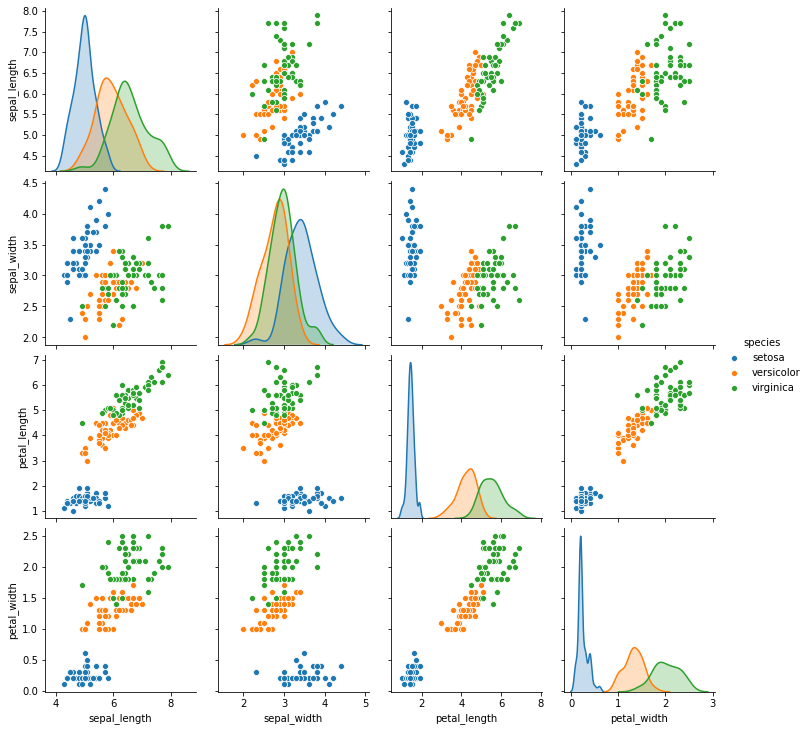

In [7]:
sns.pairplot(data = df,hue='species')

In [8]:
X = df.drop("species", axis = 1)
y = df['species']

# K-Means

In [9]:
X

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

# ** hopkins test **

In [10]:
#pip install pyclustertend

In [11]:
from pyclustertend import hopkins

In [12]:
hopkins(X, X.shape[0])

0.16351428475770666

#its close to 0 so that data has tendency to "clustering"

Docstring:
Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
no clusterability and a score tending to 0 express a high cluster tendency.

# ** Elbow Method **

In [14]:
ssd = []

K = range(1,11)

for k in K:
    model = KMeans(n_clusters = k)
    model.fit(X)
    ssd.append(model.inertia_)
ssd
    

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.25552380952379,
 46.47223015873018,
 39.066035353535376,
 34.53097186147184,
 29.988943950786066,
 28.158868474662608,
 26.105432957393486]

Text(0.5, 1.0, 'Elbow Method')

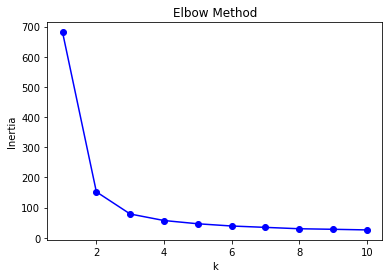

In [27]:
plt.plot(K, ssd, "bo-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")

In [18]:
model

KMeans(n_clusters=10)

In [30]:
model = KMeans(n_clusters = 3).fit(X)
model.inertia_

78.851441426146

In [31]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [40]:
cluster = model.labels_

In [32]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [33]:
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [42]:
df["clusters"] = cluster
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [45]:
ct = pd.crosstab(df.clusters, df.species )
ct.T

clusters     0   1   2
species               
setosa       0  50   0
versicolor  48   0   2
virginica   14   0  36

In [46]:
model.n_iter_

5

In [51]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

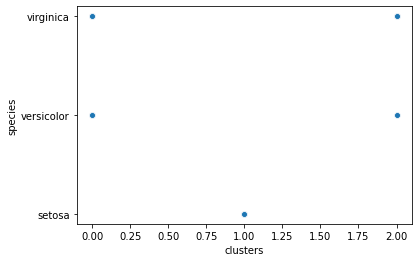

In [59]:
sns.scatterplot(df.clusters,df.species )

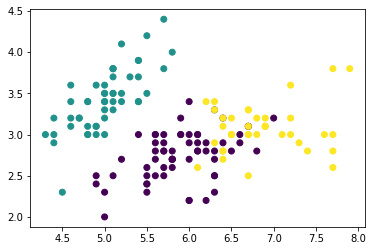

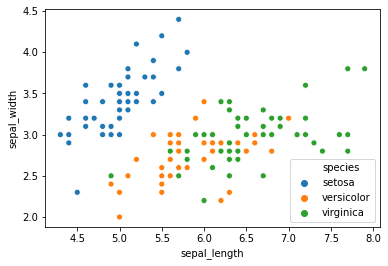

In [71]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c= cluster, cmap = 'viridis')
plt.show()
sns.scatterplot(df.iloc[:,0], df.iloc[:,1], hue = df.species , cmap = 'viridis')
plt.show()


In [66]:
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [61]:
df.iloc[:,0]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [62]:
df.iloc[:,1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

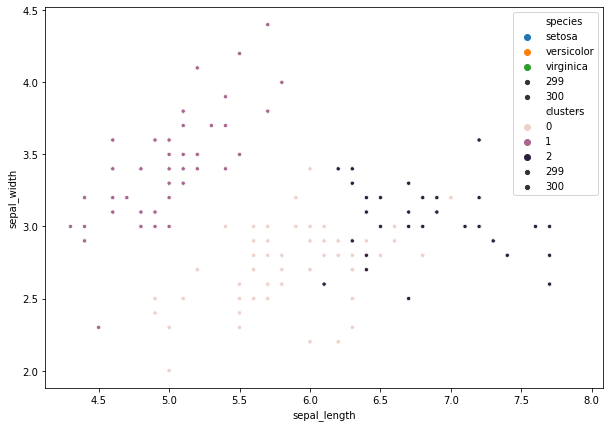

In [91]:
plt.figure(figsize= (10,7))
sns.scatterplot(df.iloc[:,0], df.iloc[:,1], hue = df.species, size=300)
sns.scatterplot(df.iloc[:,0], df.iloc[:,1], hue = df.clusters, size = 300 )
plt.show()

In [84]:
centers = model.cluster_centers_

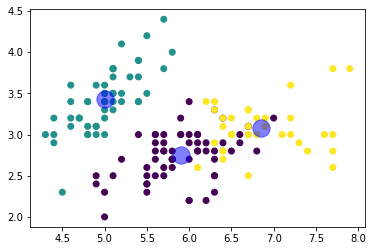

In [89]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c= cluster, cmap = 'viridis')
plt.scatter(centers[:,0], centers[:,1], c="blue", s= 300, alpha = 0.5)

In [105]:
mapping = {"setosa": 1, "versicolor":0, "virginica":2}
df["species_number"] = df.species.map(mapping)

In [107]:
df.sample(10)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

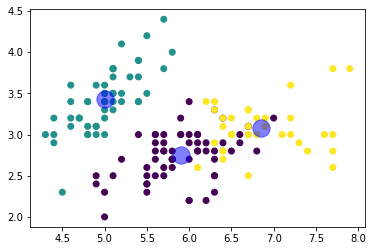

In [123]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c= cluster, cmap = 'viridis')
plt.scatter(centers[:,0], centers[:,1], c="blue", s= 300, alpha = 0.5)

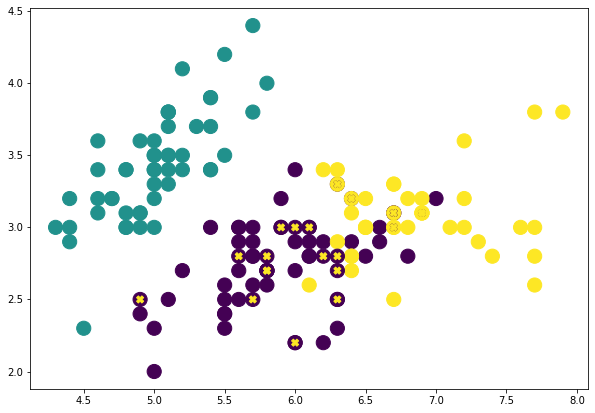

In [128]:
plt.figure(figsize = (10,7))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c= cluster, cmap = 'viridis',s= 200)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c= df.species_number, cmap = 'viridis',s= 50,marker ='X')


In [135]:
mapping2 = {1:"setosa", 0:"versicolor",2: "virginica"}
df["clusters_cat"] = df.clusters.map(mapping2)

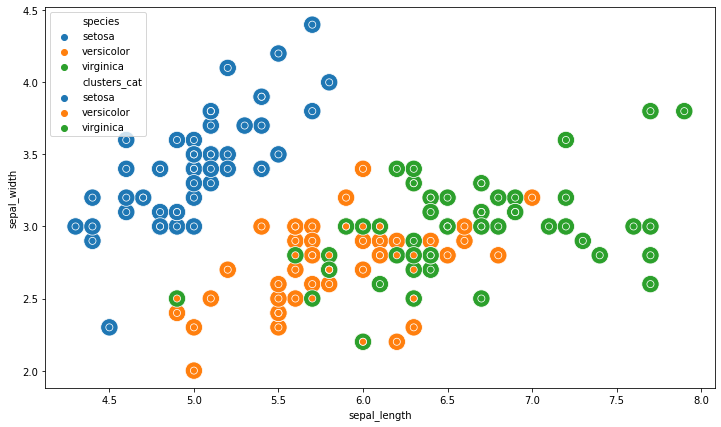

In [142]:
plt.figure(figsize = (12,7))
sns.scatterplot(df.iloc[:,0], df.iloc[:,1],hue=df.species,s= 300,cmap = 'viridis')
sns.scatterplot(df.iloc[:,0], df.iloc[:,1],hue=df.clusters_cat,s= 50, markers='x',cmap = 'viridis')


# SET 2

In [200]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [201]:
df = pd.read_csv('USArrests.csv', index_col= 0) # per 100k data rates
df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [202]:
df.info()

<class 'lux.core.frame.LuxDataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [203]:
df.describe().T

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [204]:
from pyclustertend import hopkins

In [205]:
a = []
for i in range (200):
    b = hopkins(df,df.shape[0])
    print(b)
    a.append(b)
np.mean(a)

0.3980029770110802
0.4262144806070772
0.4182674661142842
0.42694221755537226
0.42966126580741054
0.4347779491154141
0.4215040527608758
0.4536843856690149
0.41292765415446464
0.41876001769953375
0.40802312818878805
0.4279059777454654
0.4132400234805603
0.407305438305206
0.4002931341007814
0.4427261644274181
0.44121646298214207
0.42329617296669014
0.43867809967025334
0.4222477165270528
0.4195032283182552
0.39751732813297774
0.45291752243348465
0.44013396405166233
0.43431802986937174
0.4276880505932881
0.41192599655516043
0.4424911707637003
0.42957231827996206
0.4177626060499882
0.431592878996139
0.4547787701578475
0.415223091189056
0.4394551546956482
0.41372753486880387
0.4435300333765395
0.4255721496312901
0.4222287463114431
0.41622937144530964
0.4108754198601398
0.421012114632573
0.4121638865918663
0.40870572361255103
0.44097680459607663
0.4202742525611981
0.4202972013773006
0.41087156223261223
0.43195745449554074
0.4378225348847491
0.41838148055976765
0.4339942368068496
0.449567213149

0.4265369913092294

In [206]:
np.mean(a)

0.4265369913092294

In [207]:
from sklearn.preprocessing import scale
a = []
for i in range (200):
    b = hopkins(scale(df),df.shape[0])
    print(b)
    a.append(b)
np.mean(a)

0.38200777193610486
0.37674957493826666
0.3804334921723282
0.4048185741003573
0.37205754251411066
0.37076173426457937
0.4060553002160332
0.3745485534502205
0.3729551259850481
0.38395009942285696
0.38148201553086003
0.37562909805608163
0.41416881667215905
0.3747220917414192
0.3770749865621233
0.36480561052733373
0.40168584833613563
0.37555499885566745
0.37874148424296733
0.36482724317644294
0.38669073610644794
0.39059684408476475
0.38014981991992863
0.3897987703245386
0.38404679387164936
0.36473519826287765
0.3744501180702493
0.397197166798989
0.4020303551051249
0.39836405044551143
0.38693517026047364
0.37210817087299414
0.3838111699783564
0.3682688206123191
0.3690062297524344
0.39293745896982873
0.3826084342557861
0.3779548924987152
0.3853943457019002
0.41414829593507135
0.41586223656116733
0.3891355992022206
0.3848609522756652
0.4019035865145726
0.4122660917364367
0.3931985096228781
0.3905375511140025
0.3924978805421999
0.38880818414420426
0.39266703961061045
0.381875738541768
0.38005

0.38617411531505497

In [208]:
# K means

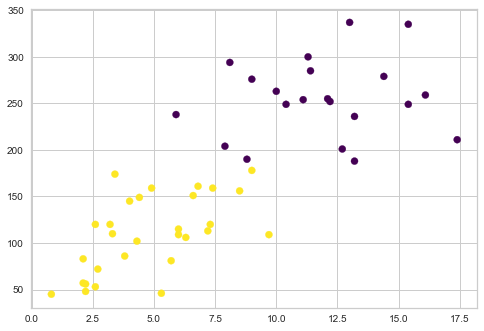

In [209]:
k_means = KMeans(n_clusters=2).fit(df)
clusters = k_means.labels_
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis");

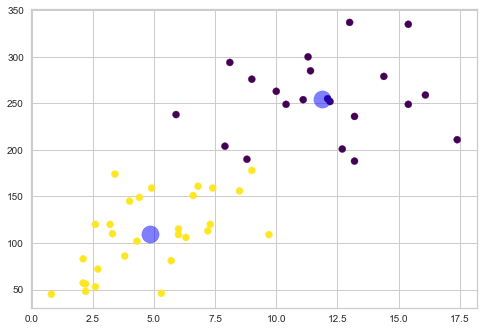

In [210]:
centroids = k_means.cluster_centers_
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")
plt.scatter(centroids[:,0], centroids[:,1], c = "blue", s = 300, alpha=0.5);

In [211]:
#Elbow

Text(0.5, 1.0, 'Inertia')

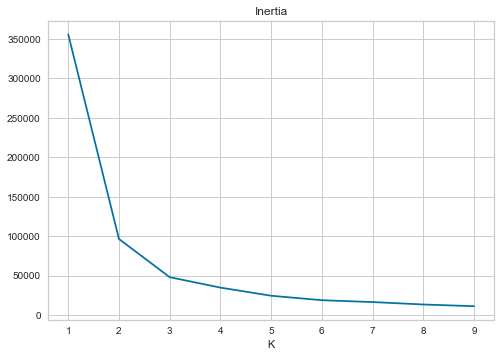

In [212]:
ssd = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df))
    ssd.append(kmeans.inertia_)
plt.plot(K, ssd, "bx-")
plt.xlabel("K")
plt.title("Inertia")

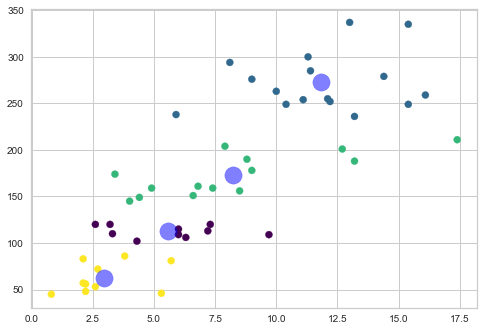

In [213]:
k_means = KMeans(n_clusters=4).fit(df)
clusters = k_means.labels_
centroids = k_means.cluster_centers_
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")
plt.scatter(centroids[:,0], centroids[:,1], c = "blue", s = 300, alpha=0.5);

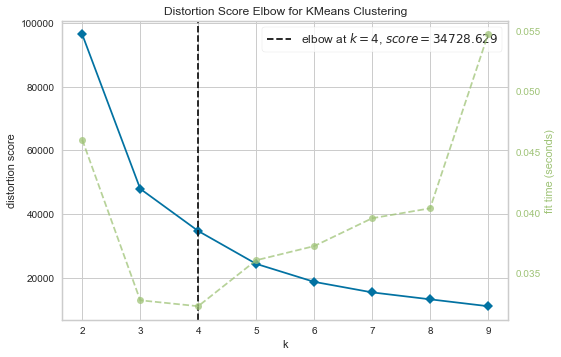

In [214]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df)
visu.poof()

In [215]:
k_means = KMeans(n_clusters=4).fit(df)
labels = k_means.labels_
df["cluster_id"] = labels
df.head()

Murder  Assault  UrbanPop  Rape  cluster_id
Alabama       13.2      236        58  21.2           1
Alaska        10.0      263        48  44.5           1
Arizona        8.1      294        80  31.0           1
Arkansas       8.8      190        50  19.5           2
California     9.0      276        91  40.6           1

In [216]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [217]:
print(f'Silhouette Score(n=4): {silhouette_score(df, labels)}')

Silhouette Score(n=4): 0.5017308871399259


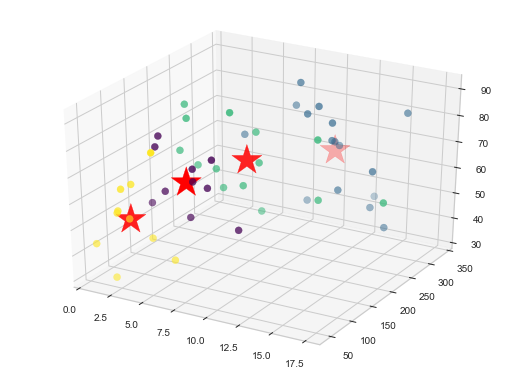

In [219]:
from mpl_toolkits.mplot3d import Axes3D
kmeans= KMeans(n_clusters=4).fit(df)
clusters= kmeans.labels_
centers = kmeans.cluster_centers_
plt.rcParams["figure.figsize"] =(7,5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c = clusters, s = 50,cmap = "viridis")
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="red",marker="*",s = 1000);

In [257]:
import plotly.express as px

kmeans= KMeans(n_clusters=4).fit(df)
clusters= kmeans.labels_


#df = px.data.iris()

#fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',color='species')
px.scatter_3d(df, df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],color=clusters)
#px.scatter(centers[:,0],centers[:,1],centers[:,2],color=centers[:,0]);
fig.show()

# ARI Score

In [247]:
new_df = df.sample(15)
new_df

Murder  Assault  UrbanPop  Rape  cluster_id
Ohio              7.3      120        75  21.4           0
Massachusetts     4.4      149        85  16.3           2
Iowa              2.2       56        57  11.3           3
Alaska           10.0      263        48  44.5           1
Wisconsin         2.6       53        66  10.8           3
Michigan         12.1      255        74  35.1           1
Oregon            4.9      159        67  29.3           2
Maine             2.1       83        51   7.8           3
Mississippi      16.1      259        44  17.1           1
Texas            12.7      201        80  25.5           2
New Hampshire     2.1       57        56   9.5           3
New Jersey        7.4      159        89  18.8           2
California        9.0      276        91  40.6           1
Kansas            6.0      115        66  18.0           0
Utah              3.2      120        80  22.9           0

In [249]:
new_df["true_label"] = [0,1,3,1,0,0,2,3,1,3,3,0,1,1,2]
new_df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [250]:
from sklearn.metrics.cluster import adjusted_rand_score

In [259]:
#RI = (number of agreeing pairs) / (number of pairs)
#ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

In [260]:
adjusted_rand_score(new_df["true_label"],new_df['cluster_id'])

0.08045977011494256